In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class SVMClassifier:
    """Initialize the SVM Classifier with a specified kernel type."""

    def __init__(self, true_data_path, fake_data_path, max_features=5000, test_size=0.3, random_state=42):
        self.true_data_path = true_data_path
        self.fake_data_path = fake_data_path
        self.max_features = max_features
        self.test_size = test_size
        self.random_state = random_state
        self.vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7, max_features=self.max_features)
        self.classifier = LinearSVC(random_state=self.random_state, max_iter=1000)

    def load_data(self):
        """Load and preprocess the data from the provided paths."""

        # Load data
        true_data = pd.read_csv(self.true_data_path)
        fake_data = pd.read_csv(self.fake_data_path)

        # Add labels
        true_data["label"] = 1
        fake_data["label"] = 0

        # Combine datasets
        data = pd.concat([true_data, fake_data], ignore_index=True)

        # Shuffle the data
        data = data.sample(frac=1, random_state=self.random_state).reset_index(drop=True)

        # Drop missing values
        data.dropna(subset=["Content"], inplace=True)

        return true_data, fake_data, data

    def preprocess_data(self, data):
        """Preprocess the data and split it into training and testing sets."""

        # Separate features and labels
        X = data["Content"]
        y = data["label"]

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state, stratify=y)

        # TF-IDF vectorization
        X_train_tfidf = self.vectorizer.fit_transform(X_train)
        X_test_tfidf = self.vectorizer.transform(X_test)

        return X_train_tfidf, X_test_tfidf, y_train, y_test

    def train_model(self, X_train_tfidf, y_train):
        """Train the SVM classifier on the training data."""

        # Train the classifier
        self.classifier.fit(X_train_tfidf, y_train)
        print("SVM Classifier trained successfully!")

    def evaluate_model(self, X_test_tfidf, y_test):
        """Evaluate the model performance."""

        y_pred = self.classifier.predict(X_test_tfidf)

        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        print("Accuracy Score: {:.2f}".format(accuracy))
        print("Classification Report:\n", classification_rep)

        return accuracy, classification_rep, y_pred

    def plot_roc_curve(self, X_test_tfidf, y_test):
        """Plot the ROC curve."""

        y_prob = self.classifier.decision_function(X_test_tfidf)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

    def plot_predicted_probabilities(self, X_test_tfidf, y_test):
        """Plot the distribution of predicted probabilities."""

        y_prob = self.classifier.decision_function(X_test_tfidf)

        plt.figure(figsize=(10, 6))
        sns.histplot(y_prob[y_test == 1], kde=True, color='blue', label='True News')
        sns.histplot(y_prob[y_test == 0], kde=True, color='red', label='Fake News')
        plt.xlabel('Predicted Probability')
        plt.ylabel('Frequency')
        plt.title('Distribution of Predicted Probabilities')
        plt.legend()
        plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Classifier trained successfully!
Accuracy Score: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      7044
           1       0.99      0.99      0.99      6363

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407



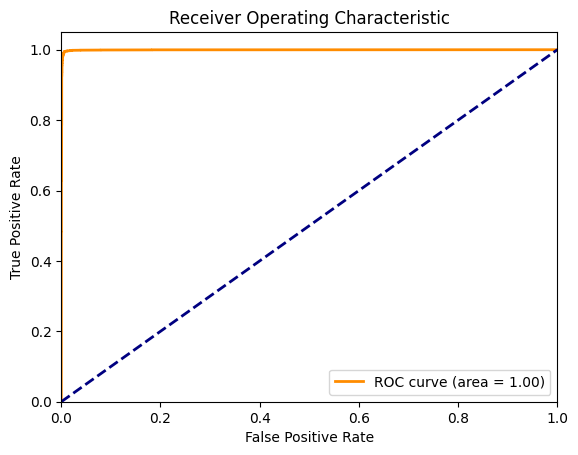

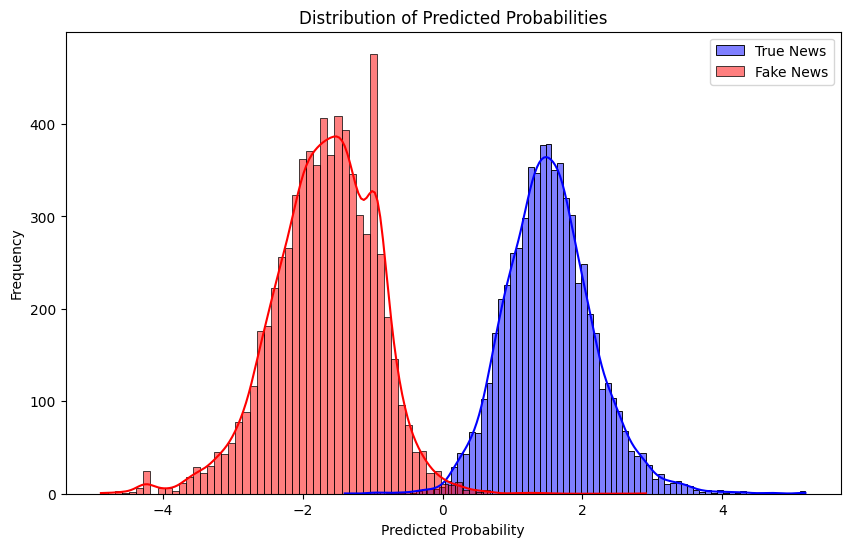

In [3]:
# Create an instance of the SVMClassifier class
svm_classifier = SVMClassifier(true_data_path='Cleaned_True_Data.csv', fake_data_path='Cleaned_False_Data.csv')

# Load and preprocess the data
true_data, fake_data, data = svm_classifier.load_data()
X_train_tfidf, X_test_tfidf, y_train, y_test = svm_classifier.preprocess_data(data)

# Train the model
svm_classifier.train_model(X_train_tfidf, y_train)

# Evaluate the model
accuracy, classification_rep, y_pred = svm_classifier.evaluate_model(X_test_tfidf, y_test)

# Plot ROC curve
svm_classifier.plot_roc_curve(X_test_tfidf, y_test)

# Plot distribution of predicted probabilities
svm_classifier.plot_predicted_probabilities(X_test_tfidf, y_test)